In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from scipy import stats


In [8]:
from PyEyeSim import pyeyesim as pysim


In [3]:
#from PyEyeSim import pyeyesim_func_obj as pysim_o


In [2]:
%load_ext autoreload
%autoreload 2

In [40]:
MemoryStudy=0
GenderStudy=1
Male=2
Mac=0  # set to 1 for macbook path, 0 for PC path
if GenderStudy:
    if Mac:
        if Male==1:
            Filepath='/Volumes/GoogleDrive/My Drive/Vienna/CreaLab/GenderProject/GenderIIMalePaint.csv'

        elif Male==0:
            Filepath='/Volumes/GoogleDrive/My Drive/Vienna/CreaLab/GenderProject/GenderIIFemalePaint.csv'
        elif Male==2:
            Filepath='/Volumes/GoogleDrive/My Drive/Vienna/CreaLab/GenderProject/GenderI.csv'

            
    else:
        if Male==1:
            Filepath='C:\\Users\\aratoj87\\Google Drive\\Vienna\\CreaLab\\GenderProject\\GenderIIMalePaint.csv'

        elif Male==0:   
            Filepath='C:\\Users\\aratoj87\\Google Drive\\Vienna\\CreaLab\\GenderProject\\GenderIIFemalePaint.csv'
        elif Male==2:
            Filepath='C:\\Users\\aratoj87\\Google Drive\\Vienna\\CreaLab\\GenderProject\\GenderI.csv'
    
    sizeX=2560
    sizeY=1600
     #StimN='Pa'
if MemoryStudy:
    if Mac:
        Filepath='/Users/jarato/Documents/EyeTracking/MemoryStudyFix.csv'
    else:
        Filepath='C:\\Users\\aratoj87\\Documents\\EyeTracking\\WilmKonigDatabase\\MemoryStudyFix.csv'
    sizeX=1280
    sizeY=960


FixData=pd.read_csv(Filepath)
if MemoryStudy:
    FixData=FixData[FixData['Repetition']==1]
   # StimN='Stimulus'


#
#fixData=pd.read_csv(Filepath)
FixData

,Unnamed: 0,Unnamed: 0.1,subjectID,subjectINFO,picture,event,eventcode,gazepoints,cluster,onset(ms),duration(ms),mean_x,mean_y,radius(px),saccade_length(px),saccade_angle(°),Painting,PartGend
0,0,0,G_002,"subjectID=G_002, dominant=RIGHT,",no image,fixation,0.0,19.0,0,0.0,149.0,1293,801,"22,4612",.,.,Aertsen,Female
1,1,2,G_002,"subjectID=G_002, dominant=RIGHT,",no image,fixation,0.0,15.0,0,183.0,117.0,1290,794,"17,0668",.,.,Aertsen,Female
2,2,4,G_002,"subjectID=G_002, dominant=RIGHT,",no image,fixation,0.0,28.0,0,316.0,217.0,1218,514,"35,2055",.,.,Aertsen,Female
3,3,6,G_002,"subjectID=G_002, dominant=RIGHT,",no image,fixation,0.0,31.0,0,591.0,250.0,1058,439,"20,9508",.,.,Aertsen,Female
4,4,8,G_002,"subjectID=G_002, dominant=RIGHT,",no image,fixation,0.0,13.0,0,891.0,100.0,1957,871,"32,7114",.,.,Aertsen,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163463,206561,19042,P87_VF,NaN,no image,fixation,0.0,20.0,0,59105.0,159.0,1526,787,"30,8357",.,.,Werner,Male
163464,206562,19044,P87_VF,NaN,no image,fixation,0.0,15.0,0,59272.0,117.0,1512,836,"28,5878",.,.,Werner,Male
163465,206563,19046,P87_VF,NaN,no image,fixation,0.0,14.0,0,59397.0,108.0,1510,805,"33,9456",.,.,Werner,Male
163466,206564,19048,P87_VF,NaN,no image,fixation,0.0,16.0,0,59697.0,125.0,1588,723,"38,4131",.,.,Werner,Male


### load dataset

In [22]:
MyDat=pysim.EyeData('GenderStudy','Within',FixData,sizeX,sizeY)

Fixation dataset GenderStudy
dataset size:  (51615, 13)
study design:  Within
presentation size:  x= 2560 pixels y= 1600  pixels
presentation size:  x= 2560 pixels y= 1600  pixels
StimName  not found !!, provide column as .DataInfo(StimName='YourColumn') default Stimulus
column found:  SubjName  default:  subjectID
column found:  mean_x  default:  mean_x
column found:  mean_y  default:  mean_y


In [37]:
MyDatMale=pysim.EyeData('GenderStudyMale','Within',FixData,sizeX,sizeY)
Stimpath='C:\\Users\\aratoj87\\Documents\\ArtHistory\\GenderProject\\Gender II_StudyDesign_Images\\Male Paintings\\'

MyDatMale.DataInfo(StimName='Painting',StimPath=Stimpath,StimExt='.jpg')

Fixation dataset GenderStudyMale
dataset size:  (52006, 11)
study design:  Within
presentation size:  x= 2560 pixels y= 1600  pixels
presentation size:  x= 2560 pixels y= 1600  pixels
StimName  not found !!, provide column as .DataInfo(StimName='YourColumn') default Stimulus
column found:  SubjName  default:  subjectID
column found:  mean_x  default:  mean_x
column found:  mean_y  default:  mean_y
info found for 56 subjects, and 12 stimuli
stimuli loaded succesfully, access as self.images


In [41]:
MyDatGend1=pysim.EyeData('GenderStudyMale','Within',FixData,sizeX,sizeY)
Stimpath='C:\\Users\\aratoj87\\Documents\\ArtHistory\\GenderProject\\Gender1Paints\\'

MyDatGend1.DataInfo(StimName='Painting',StimPath=Stimpath,StimExt='.jpg')

Fixation dataset GenderStudyMale
dataset size:  (163468, 18)
study design:  Within
presentation size:  x= 2560 pixels y= 1600  pixels
presentation size:  x= 2560 pixels y= 1600  pixels
StimName  not found !!, provide column as .DataInfo(StimName='YourColumn') default Stimulus
column found:  SubjName  default:  subjectID
column found:  mean_x  default:  mean_x
column found:  mean_y  default:  mean_y
info found for 55 subjects, and 13 stimuli
stimuli loaded succesfully, access as self.images


### provide missing column name and stimulus path information

In [23]:
Path='C:\\Users\\aratoj87\\Documents\\ArtHistory\\GenderProject\\Gender II_StudyDesign_Images\\Female Paintings\\'

MyDat.DataInfo(StimName='Painting',StimPath=Path,StimExt='.jpg')

info found for 56 subjects, and 12 stimuli
stimuli loaded succesfully, access as self.images


### descriptive stats on group

Data for  56 observers and  12  stimuli.
Mean fixation number:  76.81  +/-  11.44
fixation duration not asked for
Num of trials with zero fixations: 1
Num valid trials  671
Mean X location:  1302.5  +/-  53.0  pixels
Mean Y location:  771.5  +/-  78.3  pixels
Mean saccade  amplitude:  184.9  +/-  36.5  pixels
Mean scanpath  length:  13701.6  +/-  2165.0  pixels


(array(['Bellini_Halbakt', 'Bouguereau_JungeFrau', 'Cranach_Venus',
        'David_Recamier', 'Gentileschi_Maria', 'Goya_MajaAngezogen',
        'Goya_MajaNacht', 'Ingres_Odaliske', 'Spiro_Halbakt',
        'Valadon_Selbstbildnis', 'VanLoo_JungeFrau',
        'Wittmann_Selbstbildnis'], dtype=object),
 array(['G_001', 'G_002', 'G_003', 'G_004', 'G_006', 'G_007', 'G_009',
        'G_010', 'G_011', 'G_014', 'G_016', 'G_017', 'G_019', 'G_020',
        'G_021', 'G_023', 'G_025', 'G_026', 'G_027', 'G_030', 'G_031',
        'G_033', 'G_034', 'G_036', 'G_037', 'G_038', 'G_039', 'G_042',
        'G_043', 'G_044', 'G_045', 'G_046', 'G_048', 'G_050', 'G_051',
        'G_053', 'G_054', 'G_055', 'G_056', 'G_057', 'G_058', 'G_059',
        'G_060', 'G_061', 'G_062', 'G_064', 'G_065', 'G_066', 'P72_VF',
        'P74_VF', 'P78_VF', 'P79_VF', 'P81_VF', 'P84_VF', 'P85_VF',
        'P87_VF'], dtype=object))

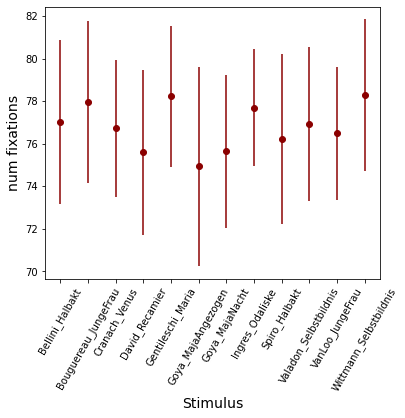

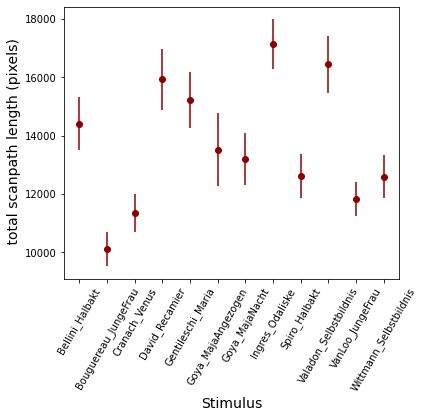

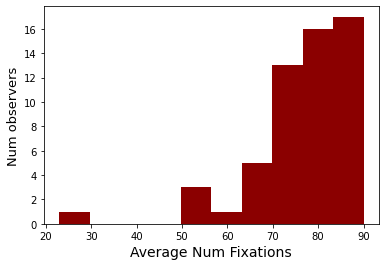

In [25]:
MyDat.RunDescriptiveFix(Visual=1,duration=0)

Data for  56 observers and  12  stimuli.
Mean fixation number:  77.39  +/-  9.94
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  672
Mean X location:  1263.5  +/-  54.2  pixels
Mean Y location:  763.7  +/-  83.4  pixels
Mean saccade  amplitude:  190.7  +/-  34.3  pixels
Mean scanpath  length:  14252.9  +/-  1927.5  pixels


(array(['Bronzino_Medici', 'Capriolo_Selbstbildnis', 'Caravaggio_Amor',
        'Freud_Mann', 'Giorgione_Jungling', 'Girodet_Endymion',
        'Lanfranco_JungerMann', 'Minardi_Selbsbildnis', 'Ribera_Jakob',
        'Rubens_Ganymed', 'Rubens_Herkules', 'Tischbein_Goethe'],
       dtype=object),
 array(['G_001', 'G_002', 'G_003', 'G_004', 'G_006', 'G_007', 'G_009',
        'G_010', 'G_011', 'G_014', 'G_016', 'G_017', 'G_019', 'G_020',
        'G_021', 'G_023', 'G_025', 'G_026', 'G_027', 'G_030', 'G_031',
        'G_033', 'G_034', 'G_036', 'G_037', 'G_038', 'G_039', 'G_042',
        'G_043', 'G_044', 'G_045', 'G_046', 'G_048', 'G_050', 'G_051',
        'G_053', 'G_054', 'G_055', 'G_056', 'G_057', 'G_058', 'G_059',
        'G_060', 'G_061', 'G_062', 'G_064', 'G_065', 'G_066', 'P72_VF',
        'P74_VF', 'P78_VF', 'P79_VF', 'P81_VF', 'P84_VF', 'P85_VF',
        'P87_VF'], dtype=object))

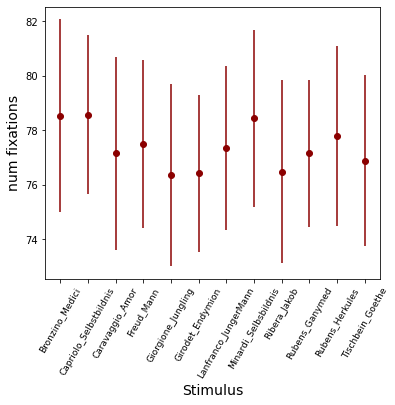

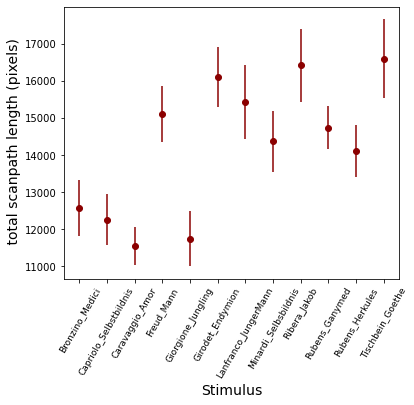

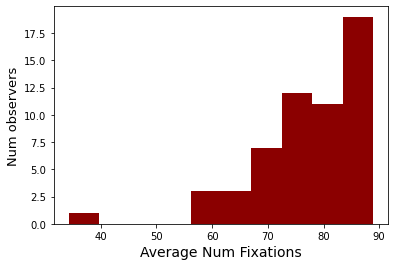

In [38]:
MyDatMale.RunDescriptiveFix(Visual=1,duration=0)

Data for  55 observers and  13  stimuli.
Mean fixation number:  228.63  +/-  35.83
fixation duration not asked for
Num of trials with zero fixations: 14
Num valid trials  701
Mean X location:  1265.0  +/-  51.3  pixels
Mean Y location:  885.2  +/-  62.1  pixels
Mean saccade  amplitude:  182.5  +/-  42.3  pixels
Mean scanpath  length:  41322.3  +/-  7033.4  pixels


(array(['Aertsen', 'Cezanne', 'Chardin', 'Cranach', 'David', 'Delacroix',
        'Goya', 'Oosterwijck', 'Ruisdael', 'Tilens', 'Waldmuller_Abschied',
        'Waldmuller_Vor', 'Werner'], dtype=object),
 array(['G_001', 'G_002', 'G_003', 'G_004', 'G_006', 'G_007', 'G_009',
        'G_010', 'G_011', 'G_014', 'G_016', 'G_017', 'G_019', 'G_020',
        'G_021', 'G_023', 'G_025', 'G_026', 'G_027', 'G_030', 'G_031',
        'G_033', 'G_034', 'G_036', 'G_037', 'G_038', 'G_039', 'G_042',
        'G_043', 'G_044', 'G_045', 'G_046', 'G_048', 'G_050', 'G_051',
        'G_053', 'G_054', 'G_055', 'G_056', 'G_057', 'G_058', 'G_059',
        'G_060', 'G_061', 'G_062', 'G_064', 'G_065', 'G_066', 'P72_VF',
        'P78_VF', 'P79_VF', 'P81_VF', 'P84_VF', 'P85_VF', 'P87_VF'],
       dtype=object))

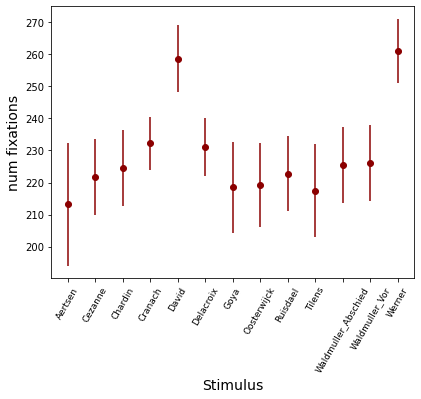

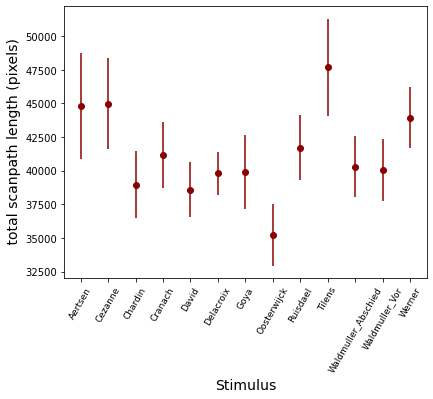

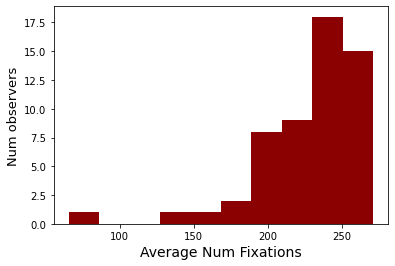

In [42]:
MyDatGend1.RunDescriptiveFix(Visual=1,duration=0)

## run group fixation descriptive comparison

Conditions ['Female' 'Male']
Calculating entropy
0 Bellini_Halbakt 5.65 maximum entropy 6.93
1 Bouguereau_JungeFrau 5.09 maximum entropy 5.97
2 Cranach_Venus 5.24 maximum entropy 6.27
3 David_Recamier 5.62 maximum entropy 6.93
4 Gentileschi_Maria 5.91 maximum entropy 6.97


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\scipy\stats\_entropy.py:72: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


5 Goya_MajaAngezogen 5.51 maximum entropy 7.0
6 Goya_MajaNacht 5.5 maximum entropy 6.9
7 Ingres_Odaliske 6.12 maximum entropy 7.15
8 Spiro_Halbakt 5.47 maximum entropy 6.41
9 Valadon_Selbstbildnis 5.92 maximum entropy 7.12
10 VanLoo_JungeFrau 5.57 maximum entropy 6.34
11 Wittmann_Selbstbildnis 5.47 maximum entropy 6.38
0 Female Num fix=  77.39 +/- 13.25
0 Female Entropy=  3.67 +/- 0.24
0 Female tot scanpath len =  13882.11 +/- 2145.62
0 Female saccade amplitude =  187.52 +/- 41.26
1 Male Num fix=  76.26 +/- 9.41
1 Male Entropy=  3.65 +/- 0.16
1 Male tot scanpath len =  13533.6 +/- 2169.36
1 Male saccade amplitude =  182.49 +/- 31.24
 
Overall group differences: 
Entropy t= 0.3398  p= 0.7354
Num Fix t= 0.3623  p=  0.7185
Scanpath lengths t= 0.593  p= 0.5556
Saccade amplitudes t= 0.508  p= 0.6135


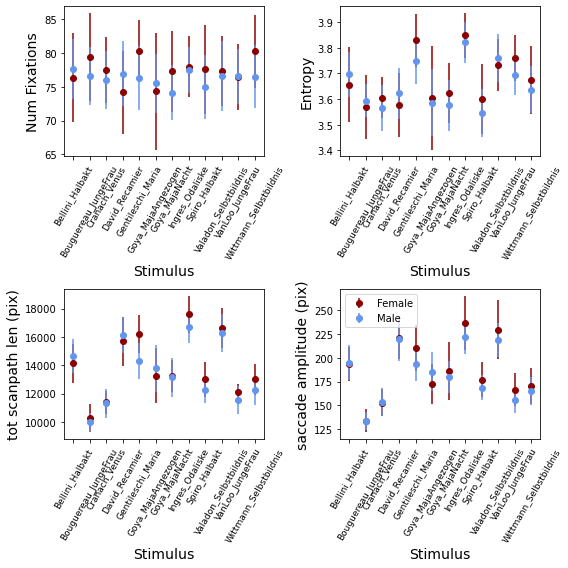

In [44]:
MyDat.CompareGroupsFix('PartGend')

Conditions ['Female' 'Male']
Calculating entropy
0 Bronzino_Medici 5.4 maximum entropy 6.51
1 Capriolo_Selbstbildnis 5.51 maximum entropy 6.48
2 Caravaggio_Amor 5.58 maximum entropy 6.3
3 Freud_Mann 5.65 maximum entropy 6.76
4 Giorgione_Jungling 5.14 maximum entropy 6.46
5 Girodet_Endymion 6.01 maximum entropy 7.0
6 Lanfranco_JungerMann 5.62 maximum entropy 6.92
7 Minardi_Selbsbildnis 5.94 maximum entropy 6.66
8 Ribera_Jakob 5.89 maximum entropy 7.18
9 Rubens_Ganymed 5.85 maximum entropy 6.73
10 Rubens_Herkules 5.85 maximum entropy 6.66
11 Tischbein_Goethe 5.66 maximum entropy 6.91
0 Female Num fix=  78.23 +/- 11.25
0 Female Entropy=  3.69 +/- 0.17
0 Female tot scanpath len =  14268.77 +/- 1703.92
0 Female saccade amplitude =  190.69 +/- 38.83
1 Male Num fix=  76.61 +/- 8.47
1 Male Entropy=  3.67 +/- 0.15
1 Male tot scanpath len =  14238.06 +/- 2114.36
1 Male saccade amplitude =  190.7 +/- 29.44
 
Overall group differences: 
Entropy t= 0.5051  p  0.6155
Num Fix t= 0.5999  p  0.5511
Sca

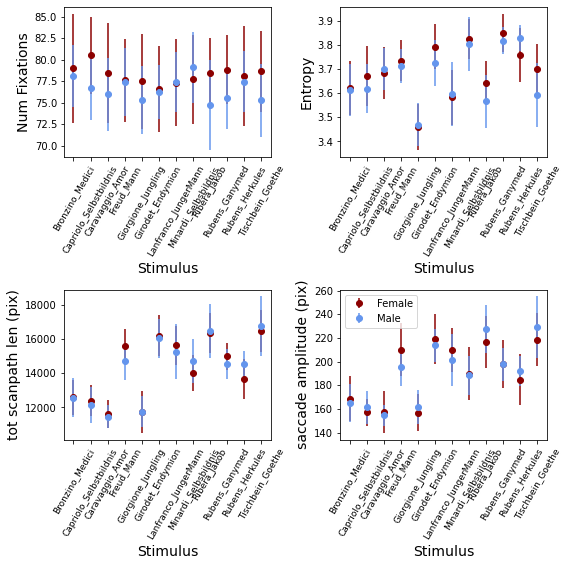

In [39]:
MyDatMale.CompareGroupsFix('PartGend')

Conditions ['Female' 'Male']
Calculating entropy


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\scipy\stats\_entropy.py:72: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


0 Aertsen 6.66 maximum entropy 7.13
1 Cezanne 6.37 maximum entropy 6.87
2 Chardin 6.01 maximum entropy 6.83
3 Cranach 6.3 maximum entropy 7.09
4 David 5.95 maximum entropy 6.87
5 Delacroix 6.39 maximum entropy 6.97
6 Goya 5.84 maximum entropy 6.82
7 Oosterwijck 6.18 maximum entropy 6.82
8 Ruisdael 6.2 maximum entropy 6.89
9 Tilens 6.56 maximum entropy 7.22
10 Waldmuller_Abschied 6.07 maximum entropy 6.97
11 Waldmuller_Vor 6.23 maximum entropy 6.92
12 Werner 6.38 maximum entropy 7.06
0 Female Num fix=  228.36 +/- 43.23
0 Female Entropy=  4.63 +/- 0.21
0 Female tot scanpath len =  40986.52 +/- 8093.62
0 Female saccade amplitude =  179.58 +/- 42.67
1 Male Num fix=  228.87 +/- 27.56
1 Male Entropy=  4.66 +/- 0.12
1 Male tot scanpath len =  41623.29 +/- 5907.42
1 Male saccade amplitude =  185.14 +/- 41.79
 
Overall group differences: 
Entropy t= -0.6331  p= 0.5294
Num Fix t= -0.0517  p=  0.959
Scanpath lengths t= -0.3294  p= 0.7432
Saccade amplitudes t= -0.4785  p= 0.6343


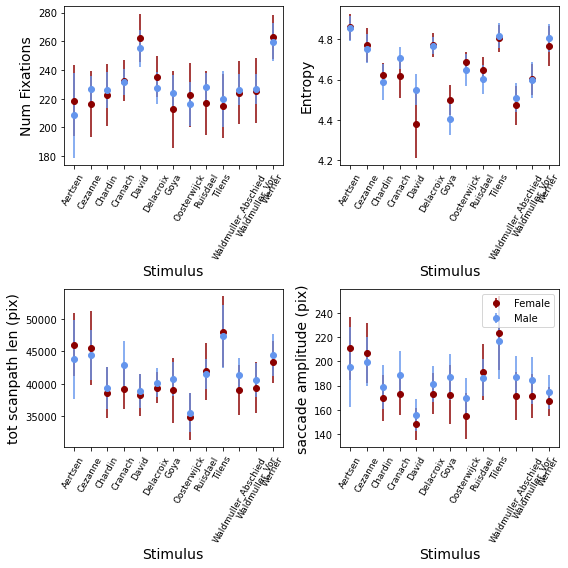

In [43]:
MyDatGend1.CompareGroupsFix('PartGend')

In [38]:
MyDat.NFix.to_pandas().to_csv('C:\\Users\\aratoj87\\Documents\\ArtHistory\\NumFix.csv')

In [18]:
FixCountInd=MyDat.FixCountCalc('Bellini_Halbakt')


In [33]:
MyDat.Conds

array(['Female', 'Male'], dtype=object)

In [56]:
MyDat.GetStimuli('C:\\Users\\aratoj87\\Documents\\ArtHistory\\GenderProject\\Gender II_StudyDesign_Images\\Female Paintings\\')

Conditions ['Female' 'Male']


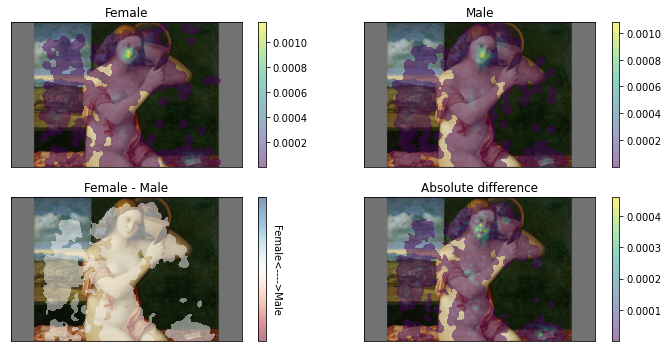

In [88]:
MyDat.CompareGroupsHeatMap(Stim='Bellini_Halbakt',betwcond='PartGend',SD=15)

Conditions ['Female' 'Male']


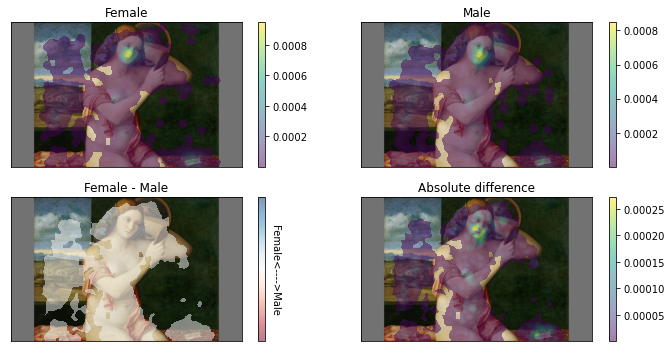

In [83]:
MyDat.CompareGroupsHeatMap(Stim='Bellini_Halbakt',betwcond='PartGend')

In [70]:
hasattr(MyDat.Stims)

TypeError: hasattr expected 2 arguments, got 1

In [169]:
np.shape(MyDat.BinnedCount(np.sum(MyDat.FixCountInd,0),'Bellini_Halbakt'))

(31, 51)

In [8]:
MyDat.BinnedCount(np.sum(MyDat.FixCountInd,0),'Bellini_Halbakt')

NameError: name 'MyDat' is not defined

In [49]:
for i in range(10):
    print(np.sum(MyDat.fixcounts[i]))

4233.0
4356.0
4225.0
4229.0
4369.0
4185.0
4223.0
4304.0
4187.0
4188.0


In [42]:
MyDat.stimuli

array(['Bellini_Halbakt', 'Bouguereau_JungeFrau', 'Cranach_Venus',
       'David_Recamier', 'Gentileschi_Maria', 'Goya_MajaAngezogen',
       'Goya_MajaNacht', 'Ingres_Odaliske', 'Spiro_Halbakt',
       'Valadon_Selbstbildnis', 'VanLoo_JungeFrau',
       'Wittmann_Selbstbildnis'], dtype=object)

In [51]:
fixcounts={}
for ci,i in enumerate(MyDat.stimuli):
        fixcounts[i]=[]

In [53]:
fixcounts['Bellini_Halbakt']

[]

### Heatmap

In [13]:
MyDat.Heatmap('Bellini_Halbakt',SD=50,Vis=1)

AttributeError: 'EyeData' object has no attribute 'NS'